#Barcode Finding and Reading Software

References:
1. https://github.com/yongfeng-li/CS230_fall_2019_Fruit_Detection | Simplifying Grocery Checkout with Deep Learning
2. https://github.com/matterport/Mask_RCNN | Mask R-CNN for object detection and instance segmentation on Keras and TensorFlow
3. https://www.mvtec.com/company/research/datasets/mvtec-d2s | DENSELY SEGMENTED SUPERMARKET DATASET (MVTEC D2S)
4. https://towardsdatascience.com/barcodes-and-qr-codes-decoder-in-python-59615c5f2b23

In [1]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
!pip uninstall h5py -y
!pip uninstall scikit-image -y
!pip uninstall tensorflow-gpu -y
!pip uninstall tf-nightly-gpu -y

Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Successfully uninstalled keras-2.8.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: keras-vis 0.4.1
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Successfully uninstalled h5py-3.1.0
Found existing installation: scikit-image 0.18.3
Uninstalling scikit-image-0.18.3:
  Successfully uninstalled scikit-image-0.18.3


In [2]:
#!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0
!pip install scikit-image==0.16.2
!pip install tensorflow-gpu==1.14.0
!pip install python-barcode
!pip install pyzbar
!sudo apt-get install libzbar0

     |████████████████████████████████| 276 kB 5.2 MB/s 
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 26.5 MB 46.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 377.1 MB 8.9 kB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 488 kB 50.5 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 3.1 MB 39.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing 

In [3]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import zipfile
import urllib.request
import shutil
import pandas as pd
import tensorflow as tf
import keras
from google.colab import drive
from sklearn.model_selection import train_test_split
from pyzbar.pyzbar import decode

#sys.path.insert(0, os.path.abspath('/content/Mask_RCNN'))
#sys.path.append("/content/Mask_RCNN") 
# Root directory of the project
#ROOT_DIR = os.path.abspath("../")
drive.mount('/content/gdrive')
#ROOT_DIR = 'gdrive/My Drive/Colab Notebooks/mask_rcnn'
ROOT_DIR = '/content/gdrive/MyDrive/Models/Mask_RCNN'
# Import Mask RCNN
#sys.path.append(ROOT_DIR)  # To find local version of the library
sys.path.append("/content/gdrive/MyDrive/Models/Mask_RCNN")
from mrcnn.config import Config
from mrcnn import model as modellib, utils
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import MaskRCNN
# Import COCO config
#sys.path.append(os.path.join(ROOT_DIR, "/content/Mask_RCNN/samples"))  # To find local version
sys.path.append(os.path.join(ROOT_DIR, "/content/gdrive/MyDrive/Models/Mask_RCNN/samples"))
import coco

# Download and install the Python COCO tools from https://github.com/waleedka/coco
# That's a fork from the original https://github.com/pdollar/coco with a bug
# fix for Python 3.
# I submitted a pull request https://github.com/cocodataset/cocoapi/pull/50
# If the PR is merged then use the original repo.
# Note: Edit PythonAPI/Makefile and replace "python" with "python3".
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools import mask as maskUtils
from pycocotools import mask


import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
#COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
COCO_MODEL_PATH = os.path.join("/content/gdrive/MyDrive/Models", "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    print("COCO Model not found!")
    #utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
D2S_DATSET_DIR = 'gdrive/My Drive/Dataset/d2s'

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Mounted at /content/gdrive


In [4]:
class D2SConfig(Config):
    """Configuration for training on the dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "D2S"
    

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    LEARNING_RATE =0.002
    
    
    #these 2 needs to set to training set / batch size
    STEPS_PER_EPOCH= 3000//2
    
    #VALIDATION_STEPS=114//2

    GPU_COUNT = 1
      
    IMAGES_PER_GPU = 2

    # Number of classes (including background)
    NUM_CLASSES = 1 + 60  # Background + fruit_classes
        
    #all following config to fit into 16G GPU
    BACKBONE = "resnet50"
    
    IMAGE_MIN_DIM = 384

    IMAGE_MAX_DIM = 384

    
    #VALIDATION_STEPS = 5

In [ ]:
config = D2SConfig()
config.display()

In [ ]:
from keras.models import load_model
from mrcnn.model import log
class InferenceConfig(D2SConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()
MODEL_DIR = "/content/gdrive/MyDrive/Models/final_2.h5"

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
model_path = "/content/gdrive/MyDrive/Models/final_2.h5"

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

In [7]:
import cv2

input_image = cv2.imread("/content/multiple_object_1.jpg")
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
input_image_resized = cv2.resize(input_image, (384,384), interpolation = cv2.INTER_LINEAR)

results = model.detect([input_image_resized], verbose=1)

r = results[0]

Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 73)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.94527  max:    1.77817  float32


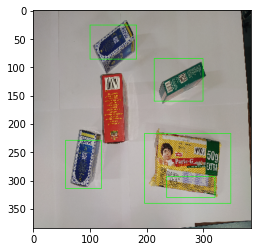

In [8]:
#Creating Bounding box around downsized image
bbox_image = input_image_resized.copy()
num_items = len(r['rois'])
roi = r['rois']

for i in range(num_items):
  cv2.rectangle(bbox_image, pt1=(roi[i][1], roi[i][0]), pt2=(roi[i][3], roi[i][2]), color = (0,255,0), thickness=1)

plt.imshow(bbox_image)

True

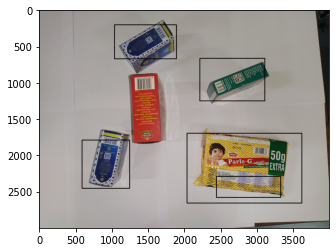

In [12]:
#Creating Bounding Box around Original Image
bbox_image = input_image.copy()
roi = r['rois']
num_items = len(roi)

DIM_WIDTH =  DIM_HEIGHT = 384
width_input, height_input, _ = input_image.shape

scale_x = width_input/DIM_WIDTH
scale_y = height_input/DIM_HEIGHT

coordinates_scaled = []

for i in range(num_items):
  coordinate_1 = (int(scale_y * roi[i][1]), int(scale_x * roi[i][0]))
  coordinate_2 = (int(scale_y * roi[i][3]), int(scale_x * roi[i][2]))

  coordinates_scaled.append([list(coordinate_1), list(coordinate_2)])
  cv2.rectangle(bbox_image, pt1= coordinate_1, pt2=coordinate_2, color = (0,0,0), thickness=10)

plt.imshow(bbox_image)
cv2.imwrite("/content/all_bounding_box_full.jpg", cv2.cvtColor(bbox_image, cv2.COLOR_BGR2RGB))

In [13]:
#Reading barcode from ROIs
result_list = []
image_array = []
for i in range(len(coordinates_scaled)):
  result_list.append(decode(input_image[coordinates_scaled[i][0][1]:coordinates_scaled[i][1][1], coordinates_scaled[i][0][0]:coordinates_scaled[i][1][0]]))
  image_array.append(input_image[coordinates_scaled[i][0][1]:coordinates_scaled[i][1][1], coordinates_scaled[i][0][0]:coordinates_scaled[i][1][0]])

True

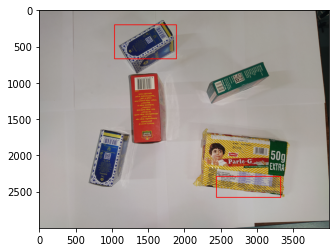

In [15]:
#Item detected but no barcode
items_with_noBarcode = input_image.copy()
for idx in range(len(result_list)):
  if len(result_list[idx]) == 0:
    #Draw red bounding box
    cv2.rectangle(items_with_noBarcode, pt1= tuple(coordinates_scaled[idx][0]), pt2=tuple(coordinates_scaled[idx][1]), color = (255,0,0), thickness=10)

plt.imshow(items_with_noBarcode)
cv2.imwrite("/content/no_barcode.jpg", cv2.cvtColor(items_with_noBarcode, cv2.COLOR_BGR2RGB))

True

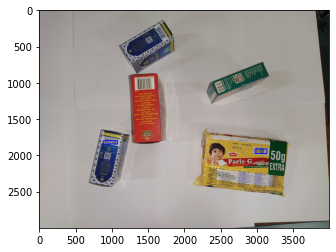

In [23]:
#Item detected with correctly read barcode
items_full_barcode = input_image.copy()
barcode_data = dict()
for idx in range(len(result_list)):
  for decode_result in result_list[idx]:
    if decode_result.type in ['EAN13', 'UPCA']:
      #Draw blue bounding box around the barcode
      local_coordinate_1 = np.array((decode_result.rect.left, decode_result.rect.top))
      local_coordinate_2 = np.array((decode_result.rect.left + decode_result.rect.width, decode_result.rect.top + decode_result.rect.height))
      if str(int(decode_result.data)) in barcode_data:
        barcode_data[str(int(decode_result.data))] += 1

      else:
        barcode_data[str(int(decode_result.data))] = 1
      cv2.rectangle(items_full_barcode, pt1= tuple(np.array(coordinates_scaled[idx][0]) + local_coordinate_1), pt2=tuple(np.array(coordinates_scaled[idx][0]) + local_coordinate_2), color = (0,0,255), thickness=10)

plt.imshow(items_full_barcode)
cv2.imwrite("/content/full_barcode.jpg", cv2.cvtColor(items_full_barcode, cv2.COLOR_BGR2RGB))

In [27]:
#Display the barcode ID and count of it
print("Barcode \tCount")
for a in barcode_data:
  print(a, barcode_data[a], sep="\t")

Barcode 	Count
8901030656026	1
8901719112737	1
